# About the Dataset

Our Aim is to __Analyse the factors towards admission.__

    The dataset includes features like GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA,	Research

## Importing all the required packages

In [4]:
import pandas as pd,numpy as np

# Plot related packages
import matplotlib.pyplot as plt,seaborn as sns; sns.set()

# Model Building related packages for Classification (Supervised)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn import preprocessing #For scaling

from sklearn.preprocessing import LabelEncoder # Converting Categorical(text) to Categorical(numerical)


from sklearn import metrics

# import package to avoid warnings 
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [3]:
admission = pd.read_csv("Admission_Predict.csv")
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


## EDA

In [6]:
admission.shape  

#The dataset has 400 samples and 9 features

(400, 9)

In [7]:
null_sum = admission.isnull().sum()
null_cols = null_sum[null_sum!=0].index

null_sum[null_sum!=0]

Series([], dtype: int64)

###### There are no null values present in the data

In [8]:
admission.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.0,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.0,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.0,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.0,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.0,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.0,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.8,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.0,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.450000,0.498117,0.0,0.00,0.00,1.0000,1.00


### Outlier checking and treating it

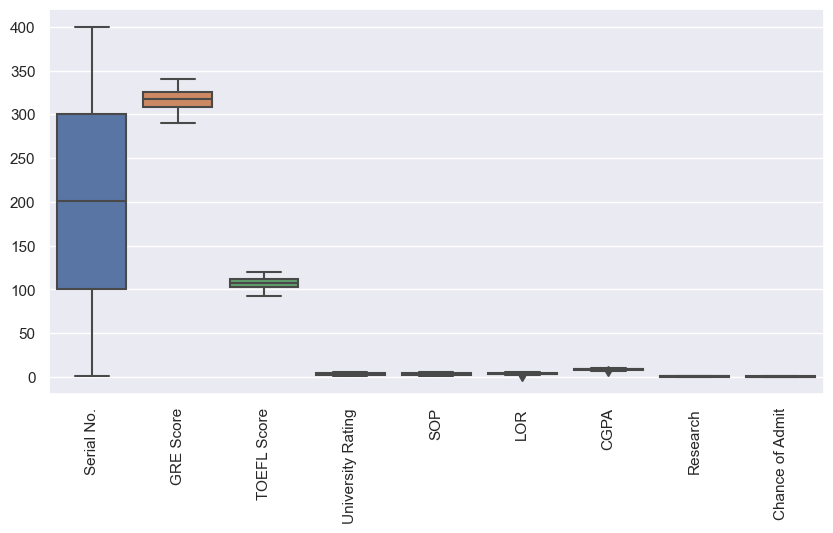

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=admission)
plt.xticks(rotation=90)
plt.show()


###### By looking the box plot, we can see that there are no outliers in  the data

### Check the correlation matrix and find the strength

In [34]:
cor_df=pd.DataFrame(admission.corr()["Chance of Admit"])
cor_df["Absolute_Corr"]=abs(cor_df["Chance of Admit"])
cor_df.sort_values(by="Absolute_Corr",ascending=False)

,Chance of Admit,Absolute_Corr
Chance of Admit,1.000000,1.000000
CGPA,0.737307,0.737307
GRE Score,0.686138,0.686138
TOEFL Score,0.672465,0.672465
University Rating,0.638983,0.638983
SOP,0.612152,0.612152
LOR,0.557481,0.557481
Research,0.519441,0.519441
Serial No.,0.016755,0.016755


<Axes: >

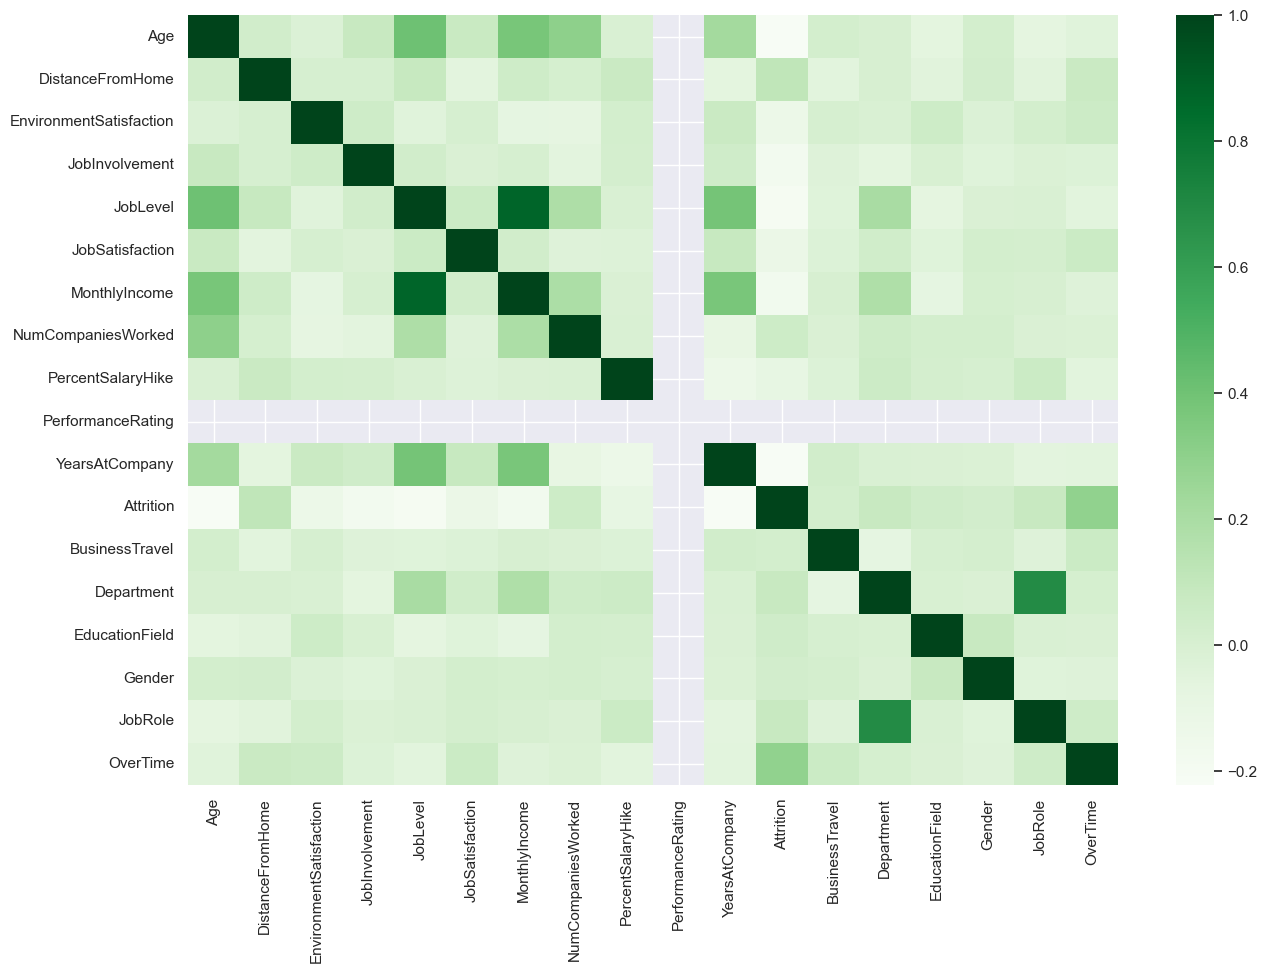

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(admission.corr(),cmap="Greens")

#### Let's check the admission rate with some features

In [13]:
admission.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1


<Axes: xlabel='Chance of Admit', ylabel='count'>

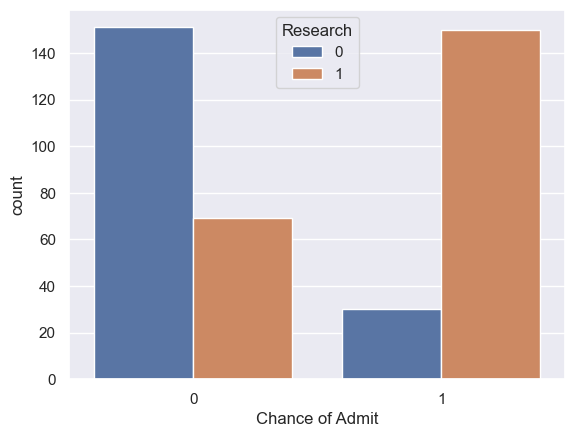

In [15]:
# admission vs Research

sns.countplot(x="Chance of Admit",data=admission,hue="Research")



#### Let's separate only the Indpendent features for SUPERVISED LEARNING

In [16]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [19]:
X = admission.drop(["Chance of Admit"],axis=1)

Y = admission["Chance of Admit"]

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)  

### Train and test the models

In [21]:
# Logistic Regression model

log_model = LogisticRegression()  
log_model.fit(X_train, y_train)

log_model_f = log_model.predict(X_test) 
y_log_model_met=metrics.roc_auc_score(y_test,log_model_f)

print("ROC_AUC Score for y_log_model_met:\n",y_log_model_met)

ROC_AUC Score for y_log_model_met:
 0.8063973063973064


In [22]:
# Decision Tree model

tree_model = DecisionTreeClassifier()  
tree_model.fit(X_train, y_train)

tree_model_f = tree_model.predict(X_test) 
tree_model_met=metrics.roc_auc_score(y_test,tree_model_f)

print("ROC_AUC Score for tree_model_met:\n",tree_model_met)

ROC_AUC Score for tree_model_met:
 0.8602693602693603


In [23]:
ROC_AUC_Scores_2=pd.DataFrame([y_log_model_met,tree_model_met,
                                     ],columns=["ROC_AUC_Scores"]
                               ,index= ["Log_model_met","Tree_model_met",
                                     ])

ROC_AUC_Scores_2.sort_values(by="ROC_AUC_Scores",ascending=False)

,ROC_AUC_Scores
Tree_model_met,0.860269
Log_model_met,0.806397


##### By looking the above dataframe, we can see that Tree model performs better than other models..

### Grid Search

In [24]:
param_grid_dt = {
    'max_depth': list(range(1,15)),
    'min_samples_split': list(range(1,15)),
    'min_samples_leaf': list(range(1,15)),
    'criterion': ["gini", "entropy", "log_loss"]
}

param_grid_lr = {
    'C': list(range(1,15))
}


In [25]:
grid_search_dt = GridSearchCV(tree_model, param_grid_dt, scoring="roc_auc", cv=5, n_jobs=-1)
grid_search_lr = GridSearchCV(log_model, param_grid_lr, scoring="roc_auc", cv=5, n_jobs=-1)

In [26]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
             scoring='roc_auc')

In [27]:
params = grid_search_lr.best_params_

c_val = params["C"]


In [28]:
lr_best = LogisticRegression(C=c_val)
lr_best.fit(X_train, y_train)

log_model_f1 = lr_best.predict(X_test) 
y_log_model_met1=metrics.roc_auc_score(y_test,log_model_f1)

print("ROC_AUC Score for y_log_model_met:\n",y_log_model_met1)

ROC_AUC Score for y_log_model_met:
 0.8156565656565657


In [29]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14]},
             scoring='roc_auc')

In [30]:
params = grid_search_dt.best_params_
md = params["max_depth"]
ml = params["min_samples_leaf"]
ms = params["min_samples_split"]
cr = params["criterion"]

In [31]:
params

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 13,
 'min_samples_split': 13}

In [32]:
dt_best = DecisionTreeClassifier(max_depth= md, min_samples_leaf= ml, min_samples_split= ms,criterion=cr)  
dt_best.fit(X_train, y_train)

tree_model_f1 = dt_best.predict(X_test) 
tree_model_met1=metrics.roc_auc_score(y_test,tree_model_f1)

print("Accuracy for tree_model_met:\n",tree_model_met1)

Accuracy for tree_model_met:
 0.8425925925925926


In [33]:
ROC_AUC_Scores_2=pd.DataFrame([y_log_model_met,tree_model_met,y_log_model_met1,tree_model_met1
                                     ],columns=["ROC_AUC_Scores"]
                               ,index= ["Log_model_met","Tree_model_met","best_lr","best_dt"
                                     ])

ROC_AUC_Scores_2.T

,Log_model_met,Tree_model_met,best_lr,best_dt
ROC_AUC_Scores,0.806397,0.860269,0.815657,0.842593


### After Grid search parameters also there is little drop in Tree model and little improvement in log model